# **Quantitative Estimation of Energy Performance of Residential Buildings**




Abstract:

Today, there is a growing interest in developing energy efficient buildings since it is estimated that buildings account for about 40% of the total primary energy consumption in the world. Specifically speaking, university buildings are ones of the busiest buildings especially during term times due to their large usage frequency. Machine learning, simply put, allows the user to feed a computer algorithm an immense amount of data and have the computer learn from the data, identify patterns, and make data-driven recommendations and decisions. This project aims, by using Python programming language, to build a multi-target regression machine learning model to predict the heating and cooling loads for chosen residential buildings.

The dataset was taken from the paper:

Athanasios, T. and Angeliki, X., "*Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools*", Energy and Buildings, Volume 49, June 2012, Pages 560-567

URL: https://www.sciencedirect.com/science/article/abs/pii/S037877881200151X

And can be downloaded from the Machine Learning Repository: Center for Machine Learning and Intelligent Systems

URL: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency

# Insert Necessary Libraries 

In [2]:
#import all the necessay libraries
#We import pandas for reading and handling the data.
import pandas as pd
#Numpy provides us with very efficient ways to perform mathematical operations on arrays as well as easy array creation.
import numpy as np
#Scipy for statistical analysis
from scipy import stats
# Seaborn and matplotlab are two important and highly used libraries for displaying and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
#Sklearn provides us with the tools that we need to build a model in the later stages of the pipeline.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Load and Read Dataset

In [3]:
#Reading the data
Energy = pd.read_excel('ENB2012_data.xlsx')

# Exploratory Data Analysis (EDA)

### 1. Explore the dimensioanlity of the data

In [14]:
#explore the dimensioanlity of the data
Energy.shape

(768, 10)

### 2. Take a look at the data

In [15]:
#Take a look at the data
Energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### 3. Display data statistics

In [16]:
#display data statistics
Energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### 4. Handling null values

In [17]:
#Handling null values
Energy.isnull().sum() #we use this to check for missing values

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

# Compute Spearman rank correlation coefficient

In [42]:
#Compute Spearman rank correlation coefficient of the eight input variables
#input
X1 = Energy.loc[:,'X1'] 
X2 = Energy.loc[:,'X2'] 
X3 = Energy.loc[:,'X3'] 
X4 = Energy.loc[:,'X4']
X5 = Energy.loc[:,'X5'] 
X6 = Energy.loc[:,'X6'] 
X7 = Energy.loc[:,'X7'] 
X8 = Energy.loc[:,'X8']
#output1
Y1 = Energy.loc[:,'Y1'] 
#calculate Spearman rank between inputs and Y1
print(stats.spearmanr(X1,Y1))
print(stats.spearmanr(X2,Y1))
print(stats.spearmanr(X3,Y1))
print(stats.spearmanr(X4,Y1))
print(stats.spearmanr(X5,Y1))
print(stats.spearmanr(X6,Y1))
print(stats.spearmanr(X7,Y1))
print(stats.spearmanr(X8,Y1))
#output2
Y2 = Energy.loc[:,'Y2'] 
#calculate Spearman rank between inputs and Y2
print(stats.spearmanr(X1,Y2))
print(stats.spearmanr(X2,Y2))
print(stats.spearmanr(X3,Y2))
print(stats.spearmanr(X4,Y2))
print(stats.spearmanr(X5,Y2))
print(stats.spearmanr(X6,Y2))
print(stats.spearmanr(X7,Y2))
print(stats.spearmanr(X8,Y2))

SpearmanrResult(correlation=0.6221346925113646, pvalue=1.7712296932255273e-83)
SpearmanrResult(correlation=-0.6221346925113646, pvalue=1.7712296932255273e-83)
SpearmanrResult(correlation=0.47145764701389403, pvalue=9.359229877893464e-44)
SpearmanrResult(correlation=-0.8040269947981705, pvalue=4.03971292919412e-175)
SpearmanrResult(correlation=0.861282571359228, pvalue=1.9890289774340858e-227)
SpearmanrResult(correlation=-0.004168323715190033, pvalue=0.9081848911462924)
SpearmanrResult(correlation=0.3228603183036433, pvalue=4.320875952630272e-20)
SpearmanrResult(correlation=0.06834346339564921, pvalue=0.05834211150055966)
SpearmanrResult(correlation=0.6510194890890085, pvalue=8.654994052692392e-94)
SpearmanrResult(correlation=-0.6510194890890085, pvalue=8.654994052692392e-94)
SpearmanrResult(correlation=0.41599078037979476, pvalue=1.7093380899289605e-33)
SpearmanrResult(correlation=-0.8031745820750258, pvalue=1.7787903075001904e-174)
SpearmanrResult(correlation=0.8648761012828038, pvalu

# Data Visualisation

### show the correlation between all features using heatmap

<AxesSubplot:>

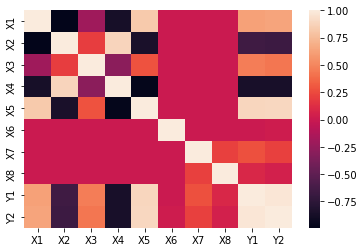

In [43]:
#use the seaborn library to see the correlation between all features
sns.heatmap(Energy.corr()) #Using corr() we can find out how the variables are related to each other

### Show the correlation between all features using pairplot

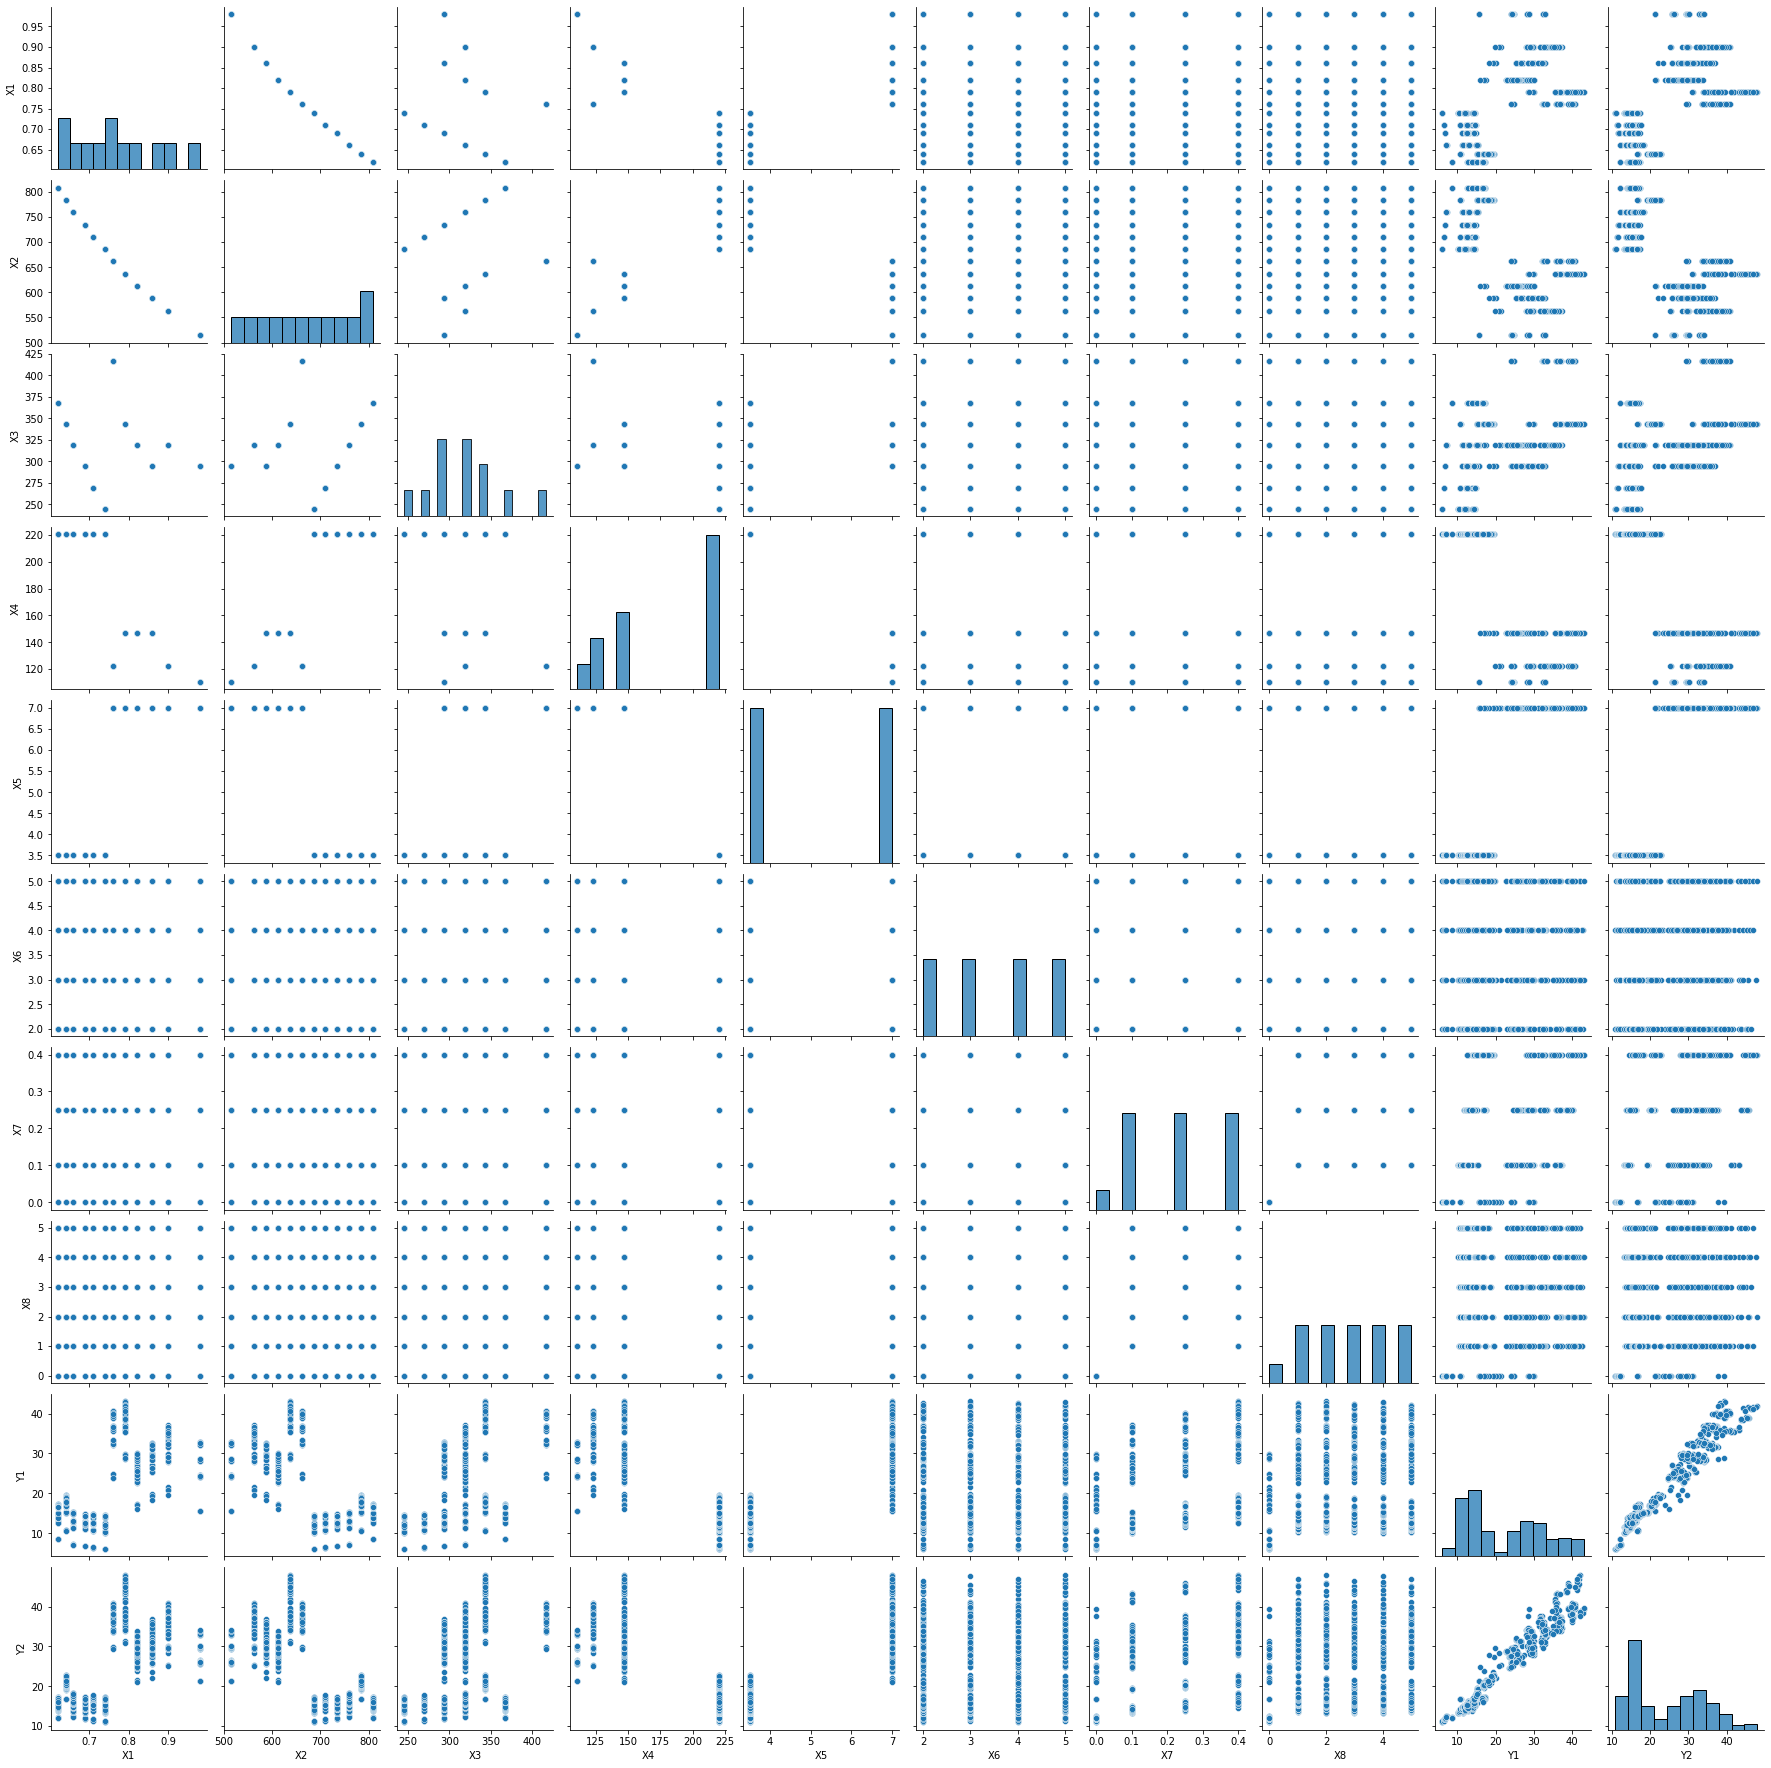

In [20]:
#Pairplotshowing variable histogram along diagonal and scatter plot on the upper and lower portion of grid.
sns.pairplot(Energy)

# Build a Regression Model

### 1. display the labels of the dataset columns

In [5]:
#display the labels of the dataset columns
print(Energy.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


### 2.Divide/slice the dataset into features (X) and targets (Y) subsets

In [6]:
#Divide/slice the dataset into features (X) and targets (Y) subsets

#features (explanatory, or independent variables.)
X = Energy.loc[:,'X1': 'X8'] 
#X1 Relative Compactness
#X2 Surface Area
#X3 Wall Area
#X4 Roof Area
#X5 Overall Height
#X6 Orientation
#X7 Glazing Area
#X8 Glazing Area Distribution

#targets (Variables of interest, response or dependent variables.)
Y = Energy.loc[:,'Y1':'Y2'] 
#Y1: Heating load
#Y2: Cooling load

#check the shape of the sliced datasets
print(X.shape,Y.shape)

(768, 8) (768, 2)


### 3.Fit the model and predct its accuracy/score

#### <span style="color:red">Without Cross Validation</span>

In [40]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #the test set will be 20% of the whole data set
#Variables of interest in an experiment (those that are measured or observed) are called response or dependent variables. 
#Other variables in the experiment that affect the response and can be set or measured by the experimenter are called predictor,
#explanatory, or independent variables.

#check the shape of the sliced datasets
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

#build multiple linear regression model
model_without = LinearRegression()

# instantiate, fit
model_without.fit(X_train, Y_train)

#Use the model to predict the 'label' of X_test.
Y_test_prediction = model_without.predict(X_test)

#Show the accuracy of the model
model_without.score(X_test,Y_test)

(614, 8) (614, 2) (154, 8) (154, 2)


0.8914974199263157

#### <span style="color:red">With Cross Validation</span>

To evaluate the performance of a model on a dataset, we need to measure how well the predictions made by the model match the observed data.

One commonly used method for doing this is known as k-fold cross-validation, which uses the following approach:

1. Randomly divide a dataset into k groups, or “folds”, of roughly equal size.

2. Choose one of the folds to be the holdout set. Fit the model on the remaining k-1 folds. Calculate the chosen accuracy score test, e.g., MSE, r2, RSME, on the observations in the fold that was held out.

3. Repeat this process k times, using a different set each time as the holdout set.

4. Calculate the average accuracy of the of the k test accuracy scores.


In [41]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=None, shuffle=False) #In practice, we typically choose between 5 and 10 folds because this 
#turns out to be the optimal number of folds that produce reliable test error rates.

#build multiple linear regression model
model_with = LinearRegression()

#use k-fold CV to evaluate/fit the model
scores = cross_val_score(model_with, X, Y, scoring='r2',cv=cv) #The r2 score varies between 0 and 100%.
#r2 deffinition:total variance explained by model) / total variance.
#So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. 
#A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.
#view the average accuracies/scores
np.mean(scores)

#another metric:mean absolute error
#scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error',cv=cv)
#view mean absolute error
#np.mean(np.absolute(scores)) #the average absolute error between the model prediction and the actual observed data
#In general, the lower the MAE, the more closely a model is able to predict the actual observations.

#anther metric:root mean squared error (RMSE)
#scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error',cv=cv)
#view root mean squared error (RMSE)
#np.sqrt(np.mean(np.absolute(scores))) #The lower the RMSE, the more closely a model is able to predict the actual observations.

#In practice we typically fit several different models and compare the RMSE or MAE of each model to decide 
#which model produces the lowest test error rates and is therefore the best model to use.



0.8850341430452054

### 4. Use the model to predict the target variables (response) of test inputs (predictors)

In [32]:
# make a prediction
#new input features
x1 = 0.98
x2 = 514.5
x3 = 294.0
x4 = 110.25
x5 = 7.0
x6 = 2.0
x7 = 0.0
x8 = 0.0

#arrange them as a row vector
new_X = [x1 , x2 , x3 , x4 , x5 , x6 , x7 , x8]

#use the regression model to predict both values Y1 (Heating load) and Y2 (Cooling load)
yhat = model.predict([new_X])

# summarize prediction
print(yhat[0,:])

[22.63518053 25.70023819]
